In [1]:
import librosa
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set current working directory to parent folder
os.chdir(os.path.abspath(".."))

In [2]:
# Archivos importantes y paths
df_annotations = pd.read_excel('data/annotations.xlsx')

# Omitimos todos los audios en development
df_annotations = df_annotations[df_annotations['Type'] != 'Development'].reset_index(drop = True)

In [3]:
# Empezamos mirando las votaciones de un audio
df_test = df_annotations[(df_annotations['Audio_Name'] == 'MSP-Conversation_0021.wav') & 
                               (df_annotations['Emotion'] == 'Arousal') &
                               (df_annotations['Part_Num'] == 1)]

In [51]:
time = pd.DataFrame()

for conversations in df_annotations['Conversation_Part'].unique():
    df_test = df_annotations[df_annotations['Conversation_Part'] == conversations]
    emotions = df_test['Emotion'].unique()
    
    for emotion in emotions:
        df_file = df_test[df_test['Emotion'] == emotion]
        
        for annotation, annotator in zip(df_file['Annotation_File'], df_file['Annotator']):
            print(annotation, annotator)
            temp_df = pd.read_csv(f'data/MSPCORPUS/Annotations/{emotion}/{annotation}', skiprows=9, header=None, names=['Time', 'Annotation'])
            temp_df['Annotator'] = annotator
            time = pd.concat([time, temp_df], ignore_index = True)
        
        df_pivot = pd.DataFrame(time.pivot_table(columns = 'Annotator', index = 'Time', values = 'Annotation').to_records()).set_index('Time')
        df_pivot = df_pivot.fillna(method='ffill')
        df_pivot['Vote'] = df_pivot.mean(axis = 1)
        df_pivot['Emotion'] = emotion
        df_pivot = df_pivot.reset_index()
        break
    break

MSP-Conversation_0021_1_005.csv 5
MSP-Conversation_0021_1_006.csv 6
MSP-Conversation_0021_1_007.csv 7
MSP-Conversation_0021_1_008.csv 8
MSP-Conversation_0021_1_009.csv 9
MSP-Conversation_0021_1_010.csv 10


C:\Users\emanu\AppData\Local\Temp\ipykernel_19420\3386312287.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df_pivot.fillna(method='ffill')


In [ ]:
def plot_for_one_conversation_part(emot: str, dfa_filtered: pd.DataFrame, pc_num: int, part_num: int, zoom = None):
    plt.figure(figsize=(15,5))
    plt.title(f'{emot} annotations on MSP-Conversation_{pc_num}_{part_num} ')
    plt.ylim([-100, 100])
    if zoom is not None:
        plt.xlim(zoom)
    ax = plt.gca()
    ax.xaxis.grid(True)
    for dff in dfa_filtered:
        plt.plot(dff['Time'], dff['Annotation'], alpha=.6, label=dff['Annotator'].iloc[0])
    
    plt.ylabel('Annotation rating')
    plt.xlabel('Time in seconds')
    plt.legend()
    plt.show()

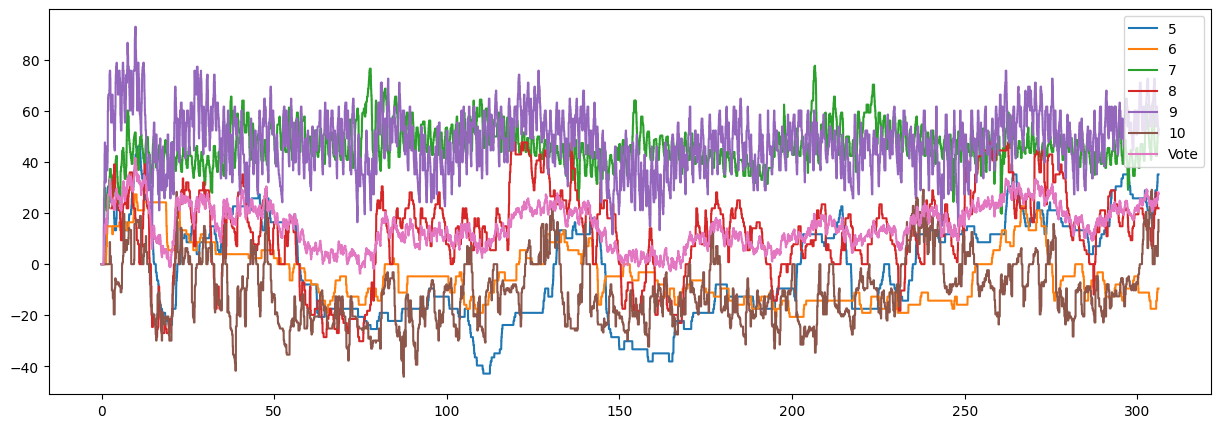

In [68]:
graficos = df_pivot.drop(['Time','Emotion'], axis = 1).columns

plt.figure(figsize=(15,5))
for grafico in graficos:
    plt.plot(df_pivot['Time'], df_pivot[grafico], label = grafico)
    
plt.legend(loc="upper right")
plt.xticks()
plt.show()